# PIQ4: 对测试集进行预测

In [1]:
from pimquery import PImQuery
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from time import time
import pandas as pd

In [2]:
# def repeats2Df(repeats, num):
#     reps, simto = list(zip(*repeats))
#     df = pd.DataFrame(dict(repeat=[0] * num, simto=[0] * num))
#     df['repeat'][reps] = 1
#     df['simto'][reps] = simto
#     return df

In [3]:
# start = time()

# repeats = piq.findRepeats()

# print('Cost time: {}s'.format(time() - start))

# saveJson(repeats, 'data/piq_res_repeats_k2.json')
# repeats = loadJson('data/piq_res_repeats_k2.json')

# df = repeats2Df(repeats, len(piq.df_hash))
# df.to_csv('data/piq_predict_repeat_k2.csv', index=False)

In [154]:
test_true_df = pd.read_csv('data/piq_test1000_true.csv')

train_data = pd.read_csv('data/train_dataset.csv')
test_data = pd.read_csv('data/test_dataset.csv')

train_data = train_data.set_index('index')
test_data = test_data.set_index('index')

In [155]:
sim_threshold = 0.18

piq = PImQuery(sim_threshold = sim_threshold)

start = time()
repeat, simto, sim = piq.predict_test(train_data.index, test_data.index)
print('Cost time: {}'.format(time() - start))

y_pred = list(repeat)

y_true = list()

for i in test_true_df.index:
    sim = test_true_df.loc[i, 'sim']
    if sim > sim_threshold:
        y_true.append(1)
    else:
        y_true.append(0)

Cost time: 20.85340929031372


In [156]:
# fbeta_score([1, 2, 3], [1, 3, 5], beta=3, average='macro')
print("\naccuracy = {}".format(accuracy_score(y_true, y_pred)))
print("precision = {}".format(precision_score(y_true, y_pred)))
print("recall = {}".format(recall_score(y_true, y_pred)))
print("f1_score = {}".format(f1_score(y_true, y_pred)))


accuracy = 0.981
precision = 1.0
recall = 0.9516539440203562
f1_score = 0.9752281616688396


# 参数
| 相似度阈值 | 准确率 | 召回率 |
| --      | --    |  --   |
| 0.1     | 0.92  | 0.94 |
| 0.12    | 0.92 | 0.94 |
| 0.14   |  0.92 | 0.95-   |
| 0.16   |  0.92 |  0.95-  |
| 0.18   |  0.92 | 0.95+ |

In [171]:
test_true_df[test_true_df.sim > 0.18].sort_values(by='sim').head()

,index,path,fp_long,repeat,simto,sim,hash,simto_hash
157,28770,images/train/卧室_现代简约/605291_2668806.jpg,23aee01aedb9b2cfdf0d709f28e8769cd92b8215963a4e...,1,23476,0.2,f1d4,f1d4
181,32370,images/train/卧室_美式田园/581432_2523616.jpg,416d7b45704e673479887e48f7378530127c446ac1b0e1...,1,32513,0.2,ec60,edc2
670,98441,images/train/餐厅_北欧极简/1608659_8726779.jpg,5909f9248a5d4c1777e9ae0d7f27725222ef6c0c1d3be5...,1,99163,0.2,fd88,fec8
337,101000,images/train/餐厅_北欧极简/896755_4471028.jpg,68fd17fe9dc606ecc2a0884ce6f321d3d1666862496bda...,1,109579,0.2,ed92,cd92
74,42268,images/train/卫生间_现代简约/593613_2601303.jpg,6d677965740f6fb061e87e4cdb09913018cc446ec9b0e9...,1,37314,0.2,37ba,37ba


In [173]:
sim_thres = 0.18

sim_lg_thres_df = test_true_df[test_true_df.sim > sim_thres]

print(len(sim_lg_thres_df[sim_lg_thres_df.hash == sim_lg_thres_df.simto_hash])/len(sim_lg_thres_df))

sim_lg_thres_df[sim_lg_thres_df.hash != sim_lg_thres_df.simto_hash].head()

0.910941475826972


,index,path,fp_long,repeat,simto,sim,hash,simto_hash
2,59511,images/train/客厅_北欧极简/1767017_9640918.jpg,e9b0bff86ced6957eb59745cbf9fd03b8da37e1c937ef2...,1,58093,0.78,fff4,fff0
9,81617,images/train/客厅_现代简约/703812_3273667.jpg,3105e447145ac23955e4ff824368967078e42c2d9cb87d...,1,96910,0.32,e561,e563
26,41024,images/train/卫生间_现代简约/501455_2023532.jpg,f06a935c495007ceb29ee06826e6c1ffe9fc68426847e2...,1,42427,0.68,fd56,fd16
42,82251,images/train/客厅_现代简约/749539_3560365.jpg,a14d999dfccc668f54c84844b7d0a160486a0a5a632ed2...,1,61406,0.30,ff41,ff43
96,53701,images/train/客厅_中式传统/541382_2267160.jpg,04b0b961e02d711b6e7b3d5896974838b71b7e189330b9...,1,54342,0.32,bb9e,9b9e


In [60]:
from helper import showimg
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
hash_df = pd.read_csv('data/piq_imhash_k2.csv')

In [80]:
def showimg_by_index(index):
    _, axs = plt.subplots(1, 2, figsize=(16, 12))
    imgs = list()
    for i in range(2):
        im_path, hash_k2 = hash_df.loc[index[i], ['path', 'hash_k2']]
        im = np.asarray(Image.open(im_path))
        showimg(im, ax=axs[i], title=hash_k2)
        imgs.append([im_path, im])
    return imgs

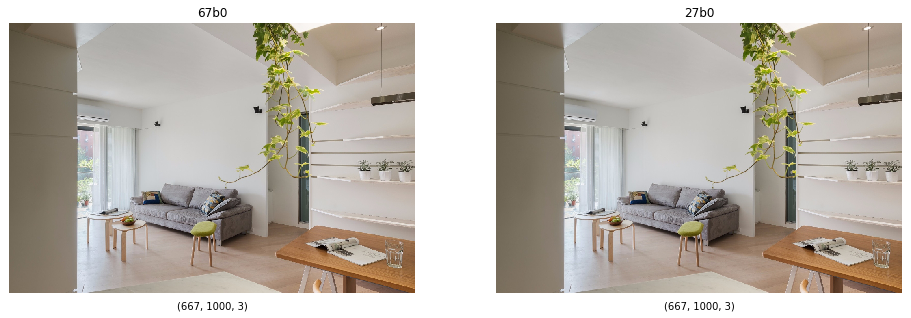

In [81]:
imgs = showimg_by_index([62225, 66912])

In [76]:
from piq_hash import PIQHash

In [77]:
piq_hash = PIQHash(hash_df)

27b0
eee0


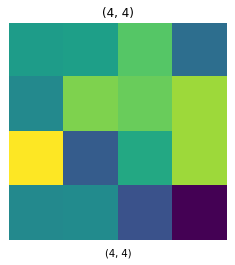

In [159]:
gray = piq_hash.imf_resize.read(imgs[1][0], 4)[1]
showimg(gray)
piq_hash.getHash(gray, hash_k=2)

print(imhash(gray))
print(imhash2(gray))

In [149]:
import cv2 as cv
import os

def cv_imread(file_path):
    root_dir, file_name = os.path.split(file_path)
    pwd = os.getcwd()
    if root_dir:
        os.chdir(root_dir)
    cv_img = cv.imread(file_name)
    os.chdir(pwd)
    return cv_img

def imhash(gray):
    dt = gray.flatten()
    xlen = len(dt)
    avg = dt.mean()
    avg_list = ['0' if i < avg else '1' for i in dt]
    return ''.join(['%x' % int(''.join(avg_list[x: x+4]), 2) for x in range(0, xlen, 4)])

def imhash_dct(gray):
    h, w = gray.shape[:2]
    vis0 = np.zeros((h,w), np.float32)
    vis0[:h,:w] = gray       #填充数据

    vis1 = cv.dct(cv.dct(vis0))

    return imhash(vis1)

In [119]:
imgfile = imgs[1][0]

img=cv_imread(imgfile) 
#img=cv2.resize(img,(64,64),interpolation=cv2.INTER_CUBIC)

In [124]:
img.shape

(667, 1000, 3)

In [125]:
h, w = img.shape[:2]
vis0 = np.zeros((h,w), np.float32)
vis0[:h,:w] = img       #填充数据

ValueError: could not broadcast input array from shape (667,1000,3) into shape (667,1000)

In [129]:
h, w = gray.shape[:2]
vis0 = np.zeros((h,w), np.float32)
vis0[:h,:w] = gray       #填充数据

In [130]:
vis0

array([[178., 179., 193., 162.],
       [171., 199., 196., 203.],
       [215., 156., 182., 203.],
       [171., 172., 153., 132.]], dtype=float32)

In [131]:
gray

array([[178, 179, 193, 162],
       [171, 199, 196, 203],
       [215, 156, 182, 203],
       [171, 172, 153, 132]], dtype=uint8)

In [132]:
vis1 = cv.dct(cv.dct(vis0))

In [137]:
vis1

array([[188.6901  , 223.22832 , 183.26268 ,  78.90091 ],
       [222.95087 , 322.93704 , 251.96501 , 130.2719  ],
       [214.98099 , 221.99834 , 171.3542  , 118.3159  ],
       [ 77.86761 , 108.99018 ,  60.59336 ,   8.018683]], dtype=float32)

In [138]:
vis0

array([[178., 179., 193., 162.],
       [171., 199., 196., 203.],
       [215., 156., 182., 203.],
       [171., 172., 153., 132.]], dtype=float32)

In [160]:
test_df_01 = pd.read_csv('data/piq_test1000_true_sim0.01.csv')

In [170]:
test_df_01[test_df_01.sim == 0.02]

,index,path,fp_long,repeat,simto,sim,hash,simto_hash
0,14093,images/train/卧室_北欧极简/505286_2047519.jpg,326ca4f60d66da4a9bb79903e8fc750ec9ffb1812c65da...,1,74692,0.02,ff62,ff62
1,57873,images/train/客厅_北欧极简/1091110_5688185.jpg,2e44e8cf5576fec855a67502497dbf28d8d497fbacb27d...,1,66858,0.02,a3cc,3ba8
15,89673,images/train/玄关_中式传统/657578_2978466.jpg,9e62e2d966b2a950168b57f259cef8687e38979da0d424...,1,76744,0.02,7774,1ff1
21,17003,images/train/卧室_北欧极简/946914_4784649.jpg,de0ac6bc273278138586d7e749ebb3cf66a5ad879cc707...,1,16631,0.02,088a,180e
22,51165,images/train/厨房_美式田园/1056902_5465876.jpg,0bb164e53d9758bc8ff91ca3ddffb422965db5e586d822...,1,111983,0.02,fdd3,fdd3
24,18698,images/train/卧室_日式/569853_2447699.jpg,cd139bb5f224ba11bad91376ddf3c9ab2f7f7f99b1428a...,1,16242,0.02,0a0f,0a4f
31,86715,images/train/客厅_美式经典/496452_1995355.jpg,07b6e941f43fe91b7a697e569138d4243f8c56bc93b8f5...,1,88163,0.02,fdd0,fc50
34,73182,images/train/客厅_现代简约/1683808_9158742.jpg,d975574d33ce463c71c8e268fa7780f536f47c6ae994f9...,1,78182,0.02,cdac,ed4a
35,69004,images/train/客厅_欧式豪华/600246_2640870.png,1c1d7afe43ed7370a50265003fdf2111a2b9934220a31a...,1,105389,0.02,f937,f445
41,70621,images/train/客厅_现代简约/1114730_5836807.png,279995b9ea431fab1f73e0f5cf26c25fcfd7a6f73d4a4b...,1,70622,0.02,fb1d,f33d


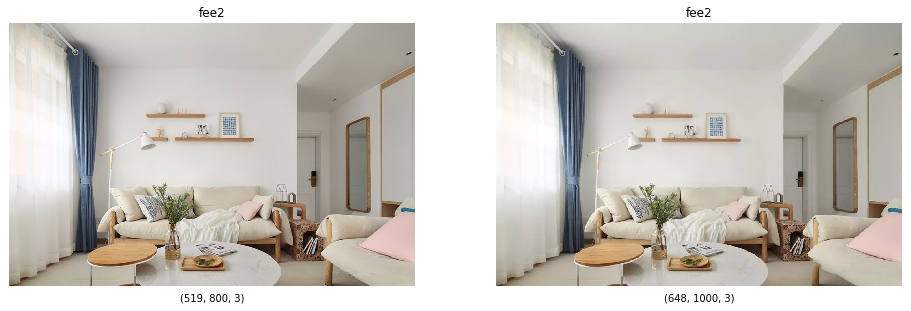

In [168]:
imgs = showimg_by_index([79202, 80567])